<a href="https://colab.research.google.com/github/jacquie0583/Neural_Network_Charity_Analysis/blob/main/AlphabetSoupCharity_Optimized_BEST_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deliverable 3: Optimizing the Data for a Neural Network-try Random Forest

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
df_application = pd.read_csv("charity_data.csv")
df_application.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' only 
df_application.drop(columns=["EIN"], inplace=True)
df_application.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
n = df_application.nunique(axis=0)

print("no.of.unique values in each column :\n",
       n)

no.of.unique values in each column :
 NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [4]:
# Look at NAME value counts for binning
name_counts = df_application.NAME.value_counts()
#  How many name counts are greater than 5?
name_counts[name_counts>5]

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
AMERICAN INDEPENDENT BUSINESS ALLIANCE                6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS          6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                6
QUAIL FEDERATION INC                                  6
SOCIETY FOR CREATIVE ANACHRONISM                      6
Name: NAME, Length: 354, dtype: int64

In [5]:
#  How many name counts are less than or equal to 5?
name_counts[name_counts <= 5]

SOCIETY FOR MANAGEMENT INFORMATION SYSTEMS                         5
CHC COMMUNITY CARE LLC                                             5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                5
CHILDRENS HEART FOUNDATION                                         5
WARRIOR BROTHERHOOD OF VETERANS MOTORCYCLE CLUB INC                5
                                                                  ..
AMERICAN INSTITUTE OF MINING METALLURGICAL AND PETROLEUM ENGINE    1
NAPLES ROUNDTABLE INC                                              1
EDMONDS HEIGHTS K12 PARENT TEACHER STUDENT ORGAINZATION            1
STORY OF HOPE OPENING PEOPLES EYES                                 1
PRIMARY WATER INSTITUTE INC                                        1
Name: NAME, Length: 19214, dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
df_application.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

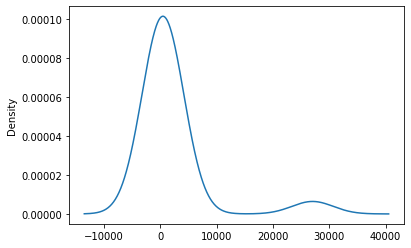

In [7]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
df_AP = df_application.APPLICATION_TYPE.value_counts()
df_AP.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(df_AP[df_AP < 200].index)

# Replace in dataframe
for app in replace_application:
    df_application.APPLICATION_TYPE = df_application.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_application.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
df_application.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C2150        1
C4500        1
C1900        1
C2570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

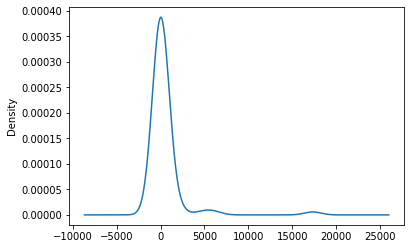

In [10]:
# Visualize the value counts of CLASSIFICATION
df_Class = df_application.CLASSIFICATION.value_counts()
df_Class.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(df_Class[df_Class < 1000].index)
 
# Replace in dataframe
for cls in replace_class:
    df_application.CLASSIFICATION= df_application.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_application.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
df_application.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [13]:
#Change datatypes ASK_AMT
df_application['ASK_AMT'] = df_application['ASK_AMT'].astype(str)

In [14]:
df_application.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [15]:
# Look at APPLICATION_TYPE value counts for binning
df_application.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

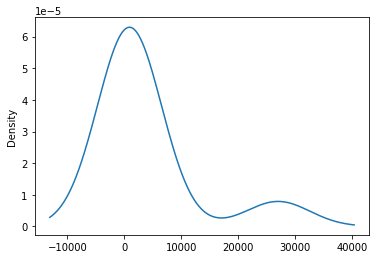

In [16]:
# Visualize the value counts of APPLICATION_TYPE
Ap = df_application.APPLICATION_TYPE.value_counts()
Ap.plot.density()

In [17]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Ap[Ap < 200].index)

# Replace in dataframe
for app in replace_application:
   df_application.APPLICATION_TYPE = df_application.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_application.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [18]:
# Look at CLASSIFICATION value counts for binning
df_application.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

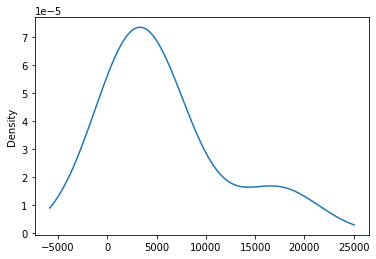

In [19]:
# Visualize the value counts of CLASSIFICATION
cla = df_application.CLASSIFICATION.value_counts()
cla.plot.density()

In [20]:
# Determine which values to replace if counts are less than ..?
replace_class = list(cla[cla < 10].index)

# Replace in dataframe
for cls in replace_class:
    df_application.CLASSIFICATION = df_application.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_application.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
# Look at NAME value counts for binning
df_application.NAME.value_counts()

PARENT BOOSTER USA INC                                             1260
TOPS CLUB INC                                                       765
UNITED STATES BOWLING CONGRESS INC                                  700
WASHINGTON STATE UNIVERSITY                                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                     408
                                                                   ... 
AMERICAN INSTITUTE OF MINING METALLURGICAL AND PETROLEUM ENGINE       1
NAPLES ROUNDTABLE INC                                                 1
EDMONDS HEIGHTS K12 PARENT TEACHER STUDENT ORGAINZATION               1
STORY OF HOPE OPENING PEOPLES EYES                                    1
PRIMARY WATER INSTITUTE INC                                           1
Name: NAME, Length: 19568, dtype: int64

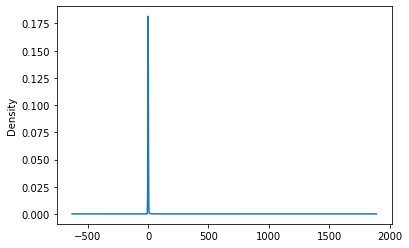

In [22]:
# Visualize the value counts of NAME
name = df_application.NAME.value_counts()
name.plot.density()

In [23]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name[name < 20].index)

# Replace in dataframe
for app in replace_name:
    df_application.NAME = df_application.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
df_application.NAME.value_counts()

Other                                             22409
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
                                                  ...  
AMERICAN CHRISTIAN FICTION WRITERS INC               21
ALPHA PHI SIGMA INC                                  21
GENERAL FEDERATION OF WOMENS CLUBS ARIZONA INC       20
DISABLED AMERICAN VETERANS AUXILIARY INC             20
TEXAS MASTER GARDENER ASSOCIATION INC                20
Name: NAME, Length: 122, dtype: int64

In [24]:
# Look at ASK_AMT value counts for binning
df_application.ASK_AMT.value_counts()

5000       25398
63981          3
10478          3
6725           3
15583          3
           ...  
502421         1
795343         1
54196          1
140722         1
5459683        1
Name: ASK_AMT, Length: 8747, dtype: int64

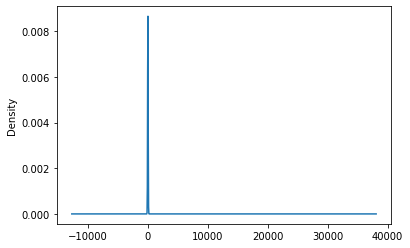

In [25]:
# Visualize the value counts of ASK_AMT
askamt = df_application.ASK_AMT.value_counts()
askamt.plot.density()

In [26]:
# Determine which values to replace if counts are less than ...?
replace_askamt = list(askamt[askamt < 50].index)

# Replace in dataframe
for app in replace_askamt:
    df_application.ASK_AMT = df_application.ASK_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
df_application.ASK_AMT.value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [27]:
df_application.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [28]:
# Generate our categorical variable lists
application_cat = df_application.dtypes[df_application.dtypes == "object"].index.tolist()

In [29]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_application[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN YOUTH FOOTBALL INC,NAME_AMVETS,NAME_ARIZONA FEDERATION OF GARDEN CLUBS,NAME_ASSOCIATION OF CIVILIAN TECHNICIANS INC,NAME_BABYWEARING INTERNATIONAL INC,NAME_BETTER WORLD FUND,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CALIFORNIA HIGHWAY PATROL EXPLORER PROGRAM,NAME_CALIFORNIA STATE CHAPER WOMENS COUNCIL OF REALTORS,NAME_CALIFORNIA STATE UNIVERSITY EMPLOYEES UNION,NAME_CALIFORNIA TEACHERS ASSOCIATION,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEAR CREEK ISD GROUPS,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC,NAME_DAUGHTERS OF UNION VETERANS OF THE CIVIL WAR 1861-1865,NAME_DEMOLAY INTERNATIONAL,NAME_DEPARTMENT OF ALABAMA AUXILIARY TO THE VFW OF THE U S,NAME_DEPARTMENT OF ALABAMA VETERANS OF FOREIGN WARS OF THE UNITED STATES,NAME_DEPARTMENT OF KANSAS LADIES AUXILIARY TO THE VFW OF THE US INC,NAME_DEPARTMENT OF NEVADA VETERANS OF FOREIGN WARS OF THE U S INC,...,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.

In [30]:
# Merge one-hot encoded features and drop the originals
df_application = df_application.merge(encode_df,left_index=True, right_index=True)
df_application = df_application.drop(application_cat,1)
df_application.head()

,STATUS,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN YOUTH FOOTBALL INC,NAME_AMVETS,NAME_ARIZONA FEDERATION OF GARDEN CLUBS,NAME_ASSOCIATION OF CIVILIAN TECHNICIANS INC,NAME_BABYWEARING INTERNATIONAL INC,NAME_BETTER WORLD FUND,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CALIFORNIA HIGHWAY PATROL EXPLORER PROGRAM,NAME_CALIFORNIA STATE CHAPER WOMENS COUNCIL OF REALTORS,NAME_CALIFORNIA STATE UNIVERSITY EMPLOYEES UNION,NAME_CALIFORNIA TEACHERS ASSOCIATION,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEAR CREEK ISD GROUPS,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DAUGHTERS OF ESTHER FELLOWSHIP INTERNATIONAL MINISTRIES INC,NAME_DAUGHTERS OF UNION VETERANS OF THE CIVIL WAR 1861-1865,NAME_DEMOLAY INTERNATIONAL,NAME_DEPARTMENT OF ALABAMA AUXILIARY TO THE VFW OF THE U S,NAME_DEPARTMENT OF ALABAMA VETERANS OF FOREIGN WARS OF THE UNITED STATES,...,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [31]:
# Split our preprocessed data into our features and target arrays
y = df_application["IS_SUCCESSFUL"].values
X = df_application.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [32]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 6
#hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                2004      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 2,089
Trainable params: 2,089
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimized_v3/",exist_ok=True)
checkpoint_path = "checkpoints_optimized_v3/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5407 - accuracy: 0.7433

Epoch 00001: saving model to checkpoints_optimized_v3/weights.01.hdf5
Epoch 2/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4683 - accuracy: 0.7720

Epoch 00002: saving model to checkpoints_optimized_v3/weights.02.hdf5
Epoch 3/20
804/804 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7732

Epoch 00003: saving model to checkpoints_optimized_v3/weights.03.hdf5
Epoch 4/20
804/804 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.7745

Epoch 00004: saving model to checkpoints_optimized_v3/weights.04.hdf5
Epoch 5/20
804/804 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.7757

Epoch 00005: saving model to checkpoints_optimized_v3/weights.05.hdf5
Epoch 6/20
804/804 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.7753

Epoch 00006: saving model to checkpoints_opt

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest model accuracy: 0.772


In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4651 - accuracy: 0.7736
Loss: 0.46508169174194336, Accuracy: 0.7736443281173706


In [41]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized_del3_BEST_FINAL.h5")